**Predict the stock closing price, Based on related Features**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get data

In [2]:
df = pd.read_csv("TSLA.csv")

**Have an overview of the entire dataset**

In [8]:
df.head() # Exclude DATE and ADJ Close Columns
X = df[["Open","High","Low","Volume"]]
Y = df["Close"]

**Visualise relationships between all columns (Only numerical).**

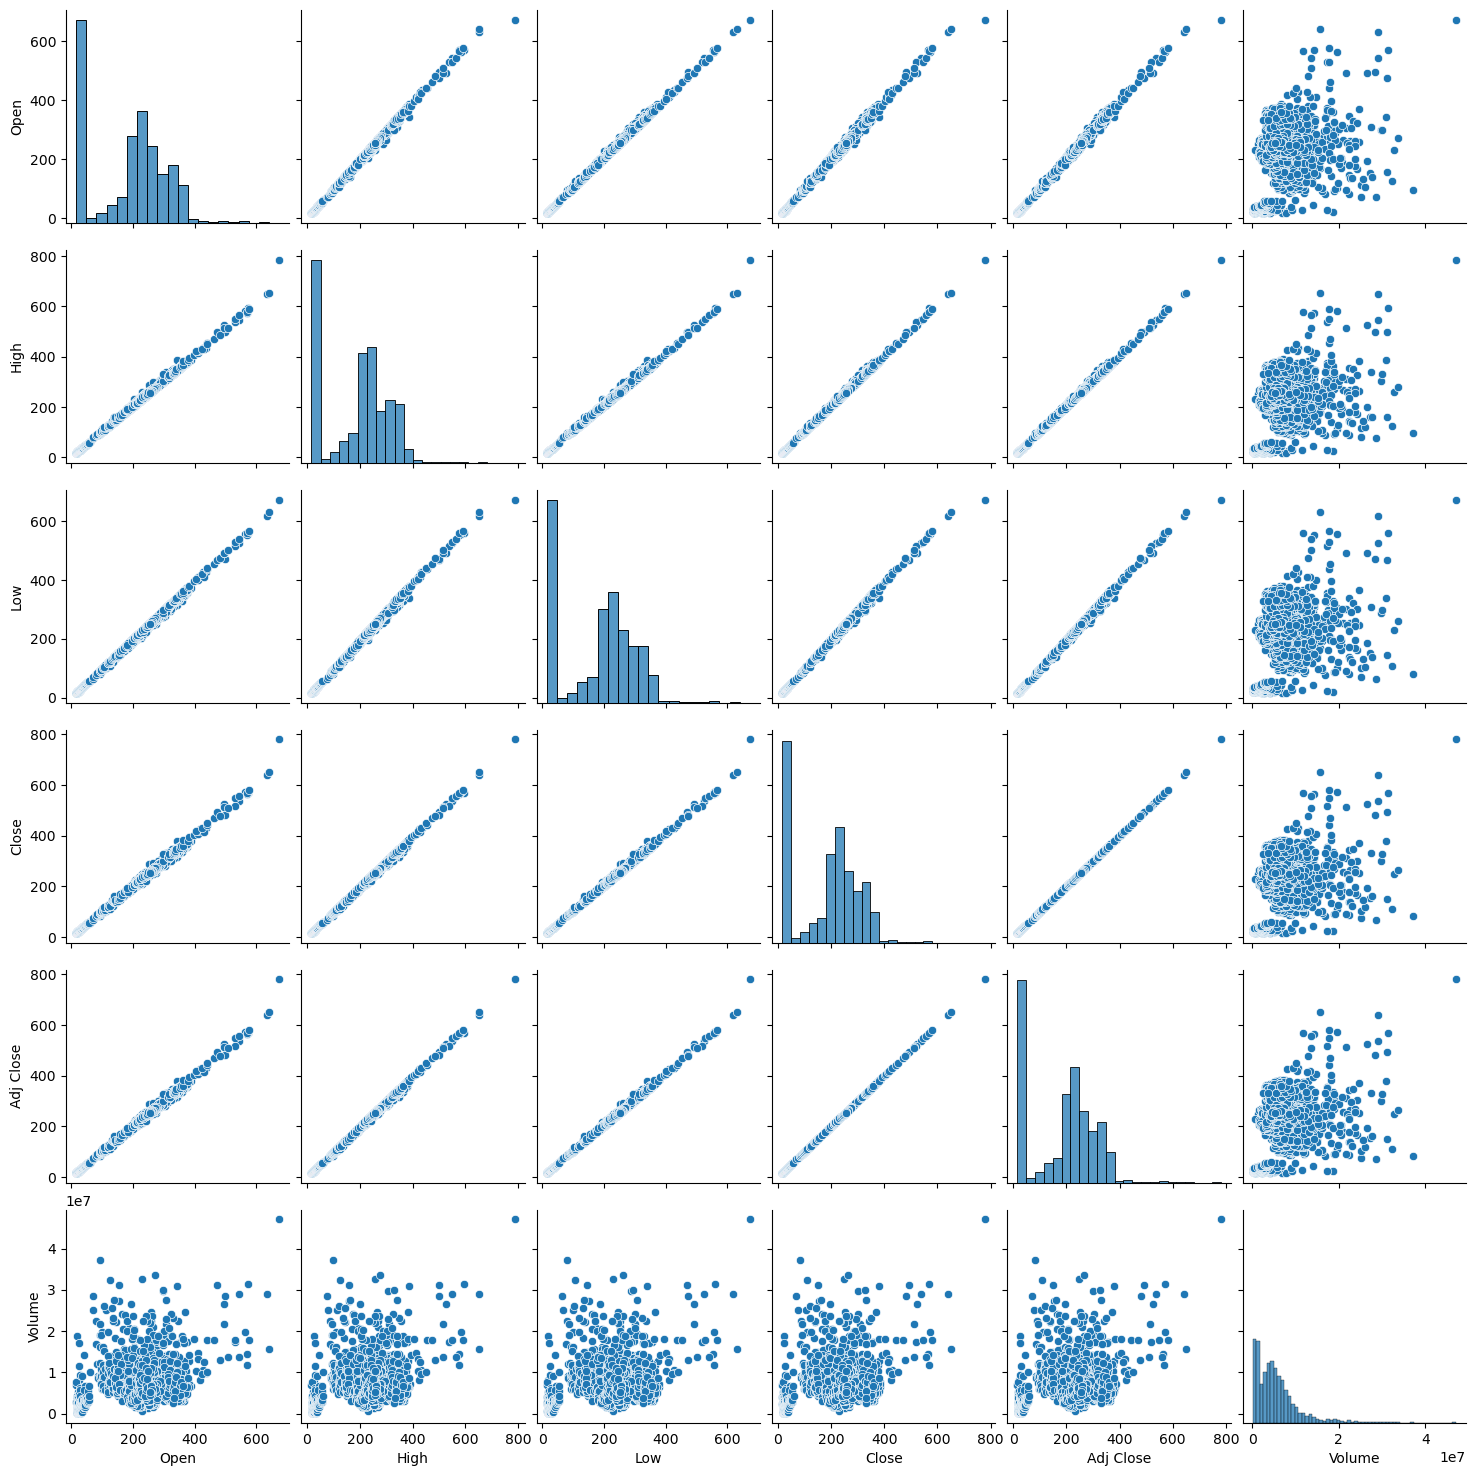

In [4]:
sns.pairplot(df)

**Visualize histogram of Closing**

<AxesSubplot:xlabel='Close', ylabel='Count'>

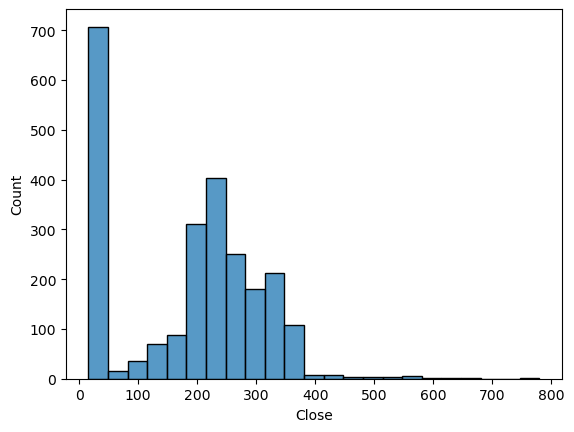

In [5]:
sns.histplot(df["Close"])

**Visualize the correlation heatmap between variables**

<AxesSubplot:>

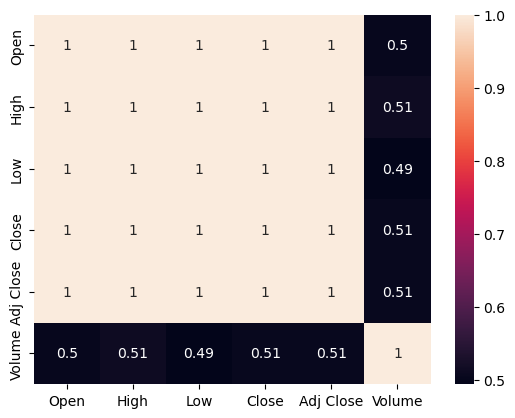

In [6]:
sns.heatmap(df.corr(),annot=True)

**Drop Null Values from your Dataset**

### Train-test Dataset

Splitting Data into Training Data Set and Test Data Set.

**Split dependant variables y and independant variables x**

In [7]:
from sklearn.model_selection import train_test_split

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

**how much data in train and in test ?**

In [17]:
print("Training: ", len(x_train) , "Testing:", len(x_test))

Training:  1691 Testing: 725


## Creating and Training the Model

Train a LinearRegression model on our training data!


In [18]:
len(x_train)

1691

**Import from scikit learn.**

In [12]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model.**

In [13]:
model = LinearRegression()

**Train/fit model on the training data.**

Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future unseen data
Learn from Features, and their Associated true outcomes.

PS: Consider droping null values from your data if you're having errors when you're fitting your model.

In [19]:
model.fit(x_train,y_train)

LinearRegression()

### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).


**Use .predict() to predict off the X_test set of the data.**

In [20]:
y_hat=model.predict(x_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

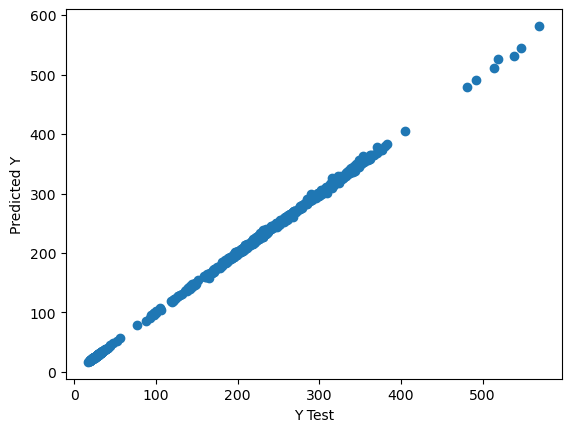

In [21]:
plt.scatter(y_test,y_hat)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model


The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Calculate these metrics using skleanr**

In [22]:
# calculate these metrics by hand!
from sklearn import metrics

**Plot a histogram of the residuals (difference between real labels and predicted labels) and make sure it looks normally distributed.** This helps us understand if Linear Regression was a valid model choice.

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_hat))
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

MAE: 1.349888648871469
MSE: 4.250109956056728
RMSE: 2.0615794808972874


**Interpreting the coefficients of our model**

In [24]:
model.coef_

array([-6.73009745e-01,  9.25465515e-01,  7.46649796e-01, -3.26461505e-08])

### Prediction on New Data

Recall , X_test data set looks exactly the same as brand new data, so we simply need to call .predict().

Testing on a new stock information:

Open: 17
High: 24
Low: 16
Volume: 14439